In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import cm
#import sklearn.linear_model

import arviz as az
#import pymc3 as pm
#import plotly.express as px

# Assignment 1: Toxicity bioassay

## Problem and data

A **bioassay** is biochemical test to estimate the potency of a sample compound. A typical bioassay involves a stimulus (ex. drugs) applied to a subject (ex. animals, tissues, plants). The corresponding response (ex. death) of the subject is thereby triggered and measured (Wikipedia).

The following bioassay taken from Racine et al. (1986) is meant to evaluate the toxicity of a drug on animals. The effect of the drug is evaluated at $k=5$ dose levels. Each dose level $x_i$ is administered to a batch of $n_i$ animals. The number of deaths $y_i$ is the observed response.

| |Dose $x_i$ (log g/ml) | Number of animals $n_i$ | Number of deaths $y_i$ |
| ---|--- | --- | --- |
| 1|-0.86 | 5 | 0 |
| 2|-0.30 | 5 | 1 |
| 3|-0.05 | 5 | 3 |
| 4|0.73  | 5 | 5 |


For instance, the dose level $x_3=-0.05$ has been administered at $n_3=5$ animals. Out of the 5 animals, $y_3=3$ died. <br/>
Note that the dose $x_i$ is measured on a logarithmic scales. Thus, negative concentration levels are present.

In [2]:
x = np.array([-0.86, -0.30, -0.05, 0.73])
n = np.array([5., 5., 5., 5.])
y = np.array([0, 1, 3, 5])

## Modeling assumptions

For the probabilistic model, we make the following assumptions:

1. The outcome of the $n_i$ animals within each group $i$ are *independent*. Each animal in the group has probability $p_i$
   of death. Consequently, the outcomes $y_i$ are binomially distributed:
   $$y_i | p_i \sim  \mathrm{Binomial}(n_i, p_i)$$
2. The probability of death $p_i$ depends on the dose $x_i$ as follows:
    $$p_i = \rm{sigm}(\alpha + \beta x_i),$$ 
    where 
    \begin{align*}
    \rm{sigm}(z) = \frac{1}{1 + e^{-z}}.
    \end{align*}
3. The prior probability of the parameters 
$\theta = \begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}$
is normal, with mean
$\mu_0 = \begin{bmatrix}
0 \\
10
\end{bmatrix}$ and covariance 
$
\Sigma_0 = \begin{bmatrix}
4 & 12 \\
12 & 100
\end{bmatrix},
$

## 1.1: Probabilistic model

Derive and comment the full probabilistic model. (Add a diagram?)

Putting together the probabilistic assumptions 1-3, we obtain:

\begin{align*}
y_i | p_i &\sim  \mathrm{Binomial}(n_i, \rm{sigm}(\alpha + \beta x_i))\\
%p_i &= \rm{sigm}(\alpha + \beta x_i) \\
\theta = 
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix} &\sim \mathcal{N}(\mu_0, \Sigma_0), \qquad 
\mu_0 = \begin{bmatrix}
0 \\
10
\end{bmatrix}, \;\;
\Sigma_0 = \begin{bmatrix}
4 & 12 \\
12 & 100
\end{bmatrix}
\end{align*}

## 1.2: Likelihood 

* Obtain a mathematical expression of the likelihood function $\mathcal{L}(\theta)$.

The likelihood function $\mathcal{L}(\theta)$ is $p(y|\theta)$, seen as a function of $\theta$, with $y$ fixed to the observed outcome. <br/>Since the individual observations $y_i$ are independent, we have:

$$\mathcal{L}(\theta) = p(y|\theta) = \prod_i {{n_i}\choose{y_i}} \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot (1- \mathrm{sigm}(\alpha + \beta x_i))^{n_i - y_i}$$

* Write a python function corresponding to the likelihood function $\mathcal{L}(\theta)$ (up to multiplicative factors)

In [17]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def lik(alpha, beta):
    pass
    # ... TODO

In [18]:
# Likelihood of the 4 observations (neglecting the multiplicative factor).
# The overall likelihood is the product of all terms.

def lik(alpha, beta):
    gamma = sigmoid(alpha+beta*x)
    lik = gamma**y * (1-gamma)**(n-y)
    return np.prod(lik, axis=-1)

* Visualize the likelihood function in 2D and comment the obtained figure. 
Hints:
    * you may use the `pcolormesh` function of matplotlib
    * appropriate ranges for $\alpha$ and $\beta$ are $[-4, 8]$ and $[-10, 40]$, respectively 

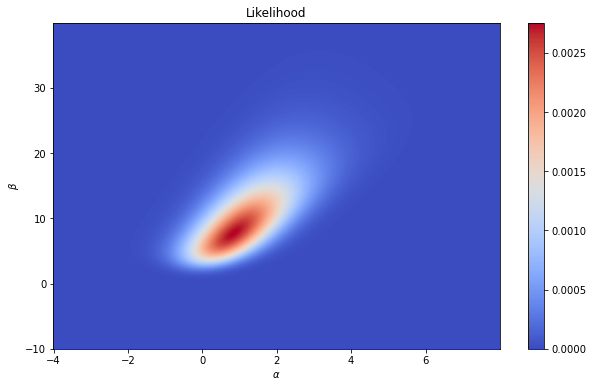

In [20]:
dalpha = 0.01
dbeta = 0.01
ALPHA = np.arange(-4, 8, dalpha)
BETA = np.arange(-10, 40, dbeta)
AA, BB = np.meshgrid(ALPHA, BETA, indexing='xy')
LL = lik(AA[..., np.newaxis], BB[..., np.newaxis])

fig, ax = plt.subplots(figsize=(10, 6))
c = ax.pcolormesh(AA, BB, LL, cmap=cm.coolwarm, shading='auto')
#plt.plot(theta_ml[0], theta_ml[1], "kx")
fig.colorbar(c, ax=ax)
ax.set_title(f"Likelihood");
ax.set_xlabel(r"$\alpha$");
ax.set_ylabel(r"$\beta$");

Parameter are positively correlated, the maximum likelihood estimate is around (1, 8), the numerical scale is small.

* Obtain an analytical expression of the log-likelihood function $\ell(\theta)$. 

In this case the, the likelihood is numerically well-posed (not too many samples, not too many multiplications). The scale 0-0.05 is not too bad!. In general, it is better to work with logarithms. Let us compute the *log-likelihood* $\ell(\theta)$:

$$\ell(\theta) = \log \mathcal{L}(\theta) = \sum_i {{n_i}\choose{y_i}} + \sum_i y_i \log \mathrm{sigm}(\alpha + \beta x_i) +  (n_i - y_i) \log (1- \mathrm{sigm}(\alpha + \beta x_i)).$$

The constant term $\sum_i {{n_i}\choose{y_i}}$ may be ignored.

In [5]:
dalpha = 0.01
dbeta = 0.01
ALPHA = np.arange(-4, 10, dalpha)
BETA = np.arange(-10, 40, dbeta)


LL = lik_fun(AA[..., np.newaxis], BB[..., np.newaxis])

In [ ]:
mu = np.array([0, 10])
cov_0 = np.array([[4, 12], [12, 100]]) 
prior_fun = stats.multivariate_normal(mean=mu, cov=cov_0)

Let us first obtain a point estimate of $\alpha$ and $\beta$ by solving the maximum likelihood problem:

$$\alpha^{\rm ml}, \beta^{\rm ml} = \arg \max_{\alpha, \beta} \mathcal{L}(\theta)$$ 

In [ ]:
# Get an initial deterministic estimate of alpha and beta (logistic regression)
#logreg = sklearn.linear_model.LogisticRegression()
#logreg.fit(x.transpose(), 1/5*y.reshape(-1)) # does not work with continuous labels
# If we transform to repeated bernoulli we may use standard logistic regression

In [ ]:
from scipy.optimize import minimize

minus_lik_fun_theta = lambda theta: -lik_fun(theta[0], theta[1])
res = minimize(minus_lik_fun_theta, x0=[0, 10])
theta_ml = res.x

We may also compute a MAP estimate

In [ ]:
minus_p_post_unscaled = lambda theta: 100*minus_lik_fun_theta(theta)*prior_fun.pdf(theta)
# note: the 100x factor (or change in default tolerance) is needed due to poor scaling of the function

res = minimize(minus_p_post_unscaled, x0=[0, 2])
theta_map = res.x

In [ ]:
dalpha = 0.01
dbeta = 0.01
ALPHA = np.arange(-4, 10, dalpha)
BETA = np.arange(-10, 40, dbeta)

AA, BB = np.meshgrid(ALPHA, BETA, indexing='xy')
LL = lik_fun(AA[..., np.newaxis], BB[..., np.newaxis])

AABB = np.stack((AA, BB), axis=-1)
PP = prior_fun.pdf(AABB) # Prior

POST_UNSC = LL * PP
normalizing_factor = np.sum(POST_UNSC)*dalpha*dbeta
POST_SC = POST_UNSC/normalizing_factor

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].set_xlim([-4, 10]);
ax[0, 0].set_ylim([-10, 40]);
ax[0, 0].contour(AA, BB, PP); #, levels=[5, 15,  95]); # levels=[5, 15, 25, 35, 45, 55, 65, 75, 85, 95])
c = ax[0, 1].pcolormesh(AA, BB, PP, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c, ax=ax[0, 1])
ax[0, 0].set_title(f"Prior distribution, contours");
ax[0, 0].set_xlabel(r"$\alpha$");
ax[0, 0].set_ylabel(r"$\beta$");
ax[0, 0].set_title(f"Prior distribution, heatmap");
ax[0, 1].set_xlabel(r"$\alpha$");
ax[0, 1].set_ylabel(r"$\beta$");

ax[1, 0].set_xlim([-4, 10]);
ax[1, 0].set_ylim([-10, 40]);
ax[1, 0].contour(AA, BB, POST_SC); #, levels=[5, 15,  95]); # levels=[5, 15, 25, 35, 45, 55, 65, 75, 85, 95])
c = ax[1, 1].pcolormesh(AA, BB, POST_SC, cmap=cm.coolwarm, shading='auto')
ax[1, 1].plot(theta_map[0], theta_map[1], "kx")
fig.colorbar(c, ax=ax[1, 1])
ax[1, 1].set_title(f"Posterior distribution, contours");
ax[1, 0].set_xlabel(r"$\alpha$");
ax[1, 0].set_ylabel(r"$\beta$");
ax[1, 1].set_title(f"Posterior distribution, heatmap");
ax[1, 1].set_xlabel(r"$\alpha$");
ax[1, 1].set_ylabel(r"$\beta$");

In [ ]:
def log_lik_fun(alpha, beta):
    gamma = sigmoid(alpha+beta*x)
    #log_lik = y*np.log(gamma) + (n-y)*np.log(1-gamma)
    # nan_to_num handles the multiplication 0*np.inf and set it to 0, as required in our case...
    log_lik = np.nan_to_num(y*np.log(gamma), nan=0) + np.nan_to_num((n-y)*np.log(1-gamma), nan=0)
    return np.sum(log_lik, axis=-1)

In [ ]:
dalpha = 0.01
dbeta = 0.01
ALPHA = np.arange(-4, 10, dalpha)
BETA = np.arange(-10, 40, dbeta)

AA, BB = np.meshgrid(ALPHA, BETA, indexing='xy')
LOG_LL = log_lik_fun(AA[..., np.newaxis], BB[..., np.newaxis])

In [ ]:
fig, ax = plt.subplots()
#c = ax.pcolormesh(AA, BB, np.exp(LOG_LL), cmap=cm.coolwarm, shading='auto')
c = ax.pcolormesh(AA, BB, LOG_LL, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c, ax=ax)
ax.set_title(f"Log-likelihood");
ax.set_xlabel(r"$\alpha$");
ax.set_ylabel(r"$\beta$");

In [ ]:
def log_post_fun(alpha, beta):
    return log_lik_fun(alpha, beta) + prior_fun.logpdf([alpha, beta])

In [ ]:
def p_ratio_fun(alpha_propose, beta_propose, alpha_previous, beta_previous):
    log_p_previous = log_post_fun(alpha_previous, beta_previous)
    log_p_propose = log_post_fun(alpha_propose, beta_propose)
    log_p_ratio = log_p_propose - log_p_previous # log(p_prop/p_prev) = log(p_prop) - log(p_prev)
    p_ratio = np.exp(log_p_ratio)
    return p_ratio

In [ ]:
p_ratio_fun(alpha_propose = 1.89, alpha_previous = 0.374, beta_propose = 24.76, beta_previous = 20.04)

In [ ]:
p_ratio_fun(alpha_propose = 0.374, alpha_previous = 1.89, beta_propose = 20.04, beta_previous = 24.76)

Let us run a Metropolis algorithm to sample from the posterior. The p_ratio function is all we need!

In [ ]:
theta_0 = np.array([0, 10])
sigma = np.diag([1.0, 5.0])
theta_step = theta_0
N = 100_000
thetas = []

for idx in range(N):
    thetas.append(theta_step)
    theta_prop = theta_step + sigma @ np.random.randn(2)
    #theta_prop = np.clip(theta_prop, 0, 1)
    
    p_ratio = p_ratio_fun(theta_prop[0], theta_prop[1], theta_step[0], theta_step[1])
    accept_prob = np.minimum(1.0, p_ratio)
    accept = (np.random.rand() < accept_prob)
    
    if accept:
        theta_step = theta_prop
thetas = np.stack(thetas)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].hist2d(x=thetas[:, 0], y=thetas[:, 1], bins=100, cmap=plt.cm.BuPu)
ax[0].set_xlim([-4, 10]);
ax[0].set_ylim([-10, 40]);
ax[0].contour(AA, BB, POST_SC); #, levels=[5, 15,  95]); # levels=[5, 15, 25, 35, 45, 55, 65, 75, 85, 95])
c = ax[1].pcolormesh(AA, BB, POST_SC, cmap=cm.coolwarm, shading='auto')

In [ ]:
np.mean(thetas[10_000:, :], axis=0)

In [ ]:
np.cov(thetas.transpose())

In [ ]:
np.sum(AA*POST_SC)*dalpha*dbeta, np.sum(BB*POST_SC)*dalpha*dbeta

In [ ]:
plt.plot(thetas[:,0])#px.scatter(thetas[:, 0])

In [ ]:
plt.plot(thetas[:, 1])

Let us do the sampling with pymc3

In [ ]:
with pm.Model():
    theta = pm.MvNormal("theta", mu=mu, cov=cov_0, shape=(2,))
    p = pm.Deterministic("p", pm.math.sigmoid(theta[0] + theta[1]*x))
    y_var = pm.Binomial("y_var", n=n, p=p, observed=y)
    trace=pm.sample(10_000)

In [ ]:
az.summary(trace)

In [ ]:
az.plot_trace(trace)

In [ ]:
az.plot_posterior(trace)

In [ ]:
az.plot_joint(trace, var_names="theta", kind="kde")